# Sales prediction dataset

# importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Advertising.csv")
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# basic understanding

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail(2)

,Unnamed: 0,TV,Radio,Newspaper,Sales
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.shape

(200, 5)

In [8]:
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [9]:
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [10]:
df.count()

Unnamed: 0    200
TV            200
Radio         200
Newspaper     200
Sales         200
dtype: int64

In [11]:
df.skew()

Unnamed: 0    0.000000
TV           -0.069853
Radio         0.094175
Newspaper     0.894720
Sales         0.407571
dtype: float64

# null values or missing data handling and outlier detection

In [12]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.drop(["Unnamed: 0"],axis=1,inplace=True)
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


Seperating numerical and categorical columns

In [15]:
num=["TV","Radio","Newspaper"]
cat=["Sales"]

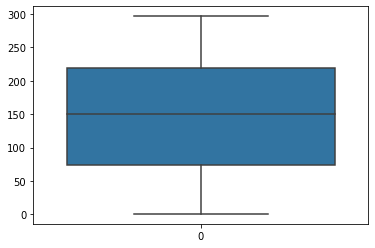

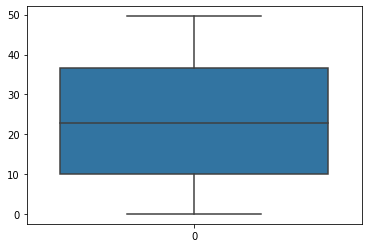

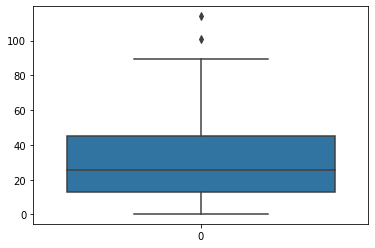

In [16]:
for i in num:
    sns.boxplot(data=df[i])
    plt.show()

In [19]:
for i in num:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr=q3-q1
    upper= q3+(iqr*1.5)
    lower= q1-(iqr*1.5)
        
    for k in df[i]:
        if k<lower or k>upper:
            df[i].replace(k,np.nan,inplace=True)
    df[i].fillna(df[i].median(),inplace=True)
    

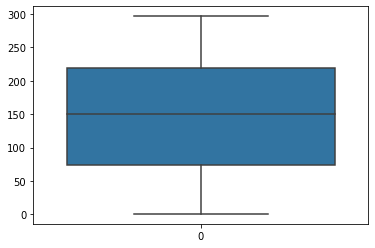

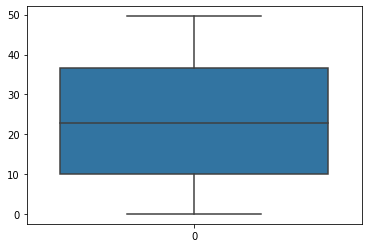

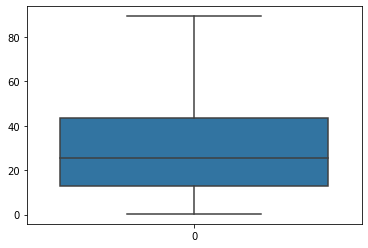

In [20]:
for i in num:
    sns.boxplot(data=df[i])
    plt.show()

#  finding the correlation between columns

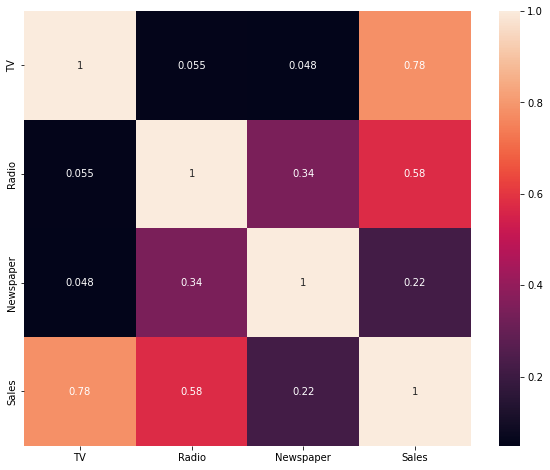

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(),annot=True)
plt.show()

# model building and prediction

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x=df[["TV","Radio","Newspaper"]].values
y=df['Sales'].values

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model=LinearRegression()

In [28]:
model.fit(X_train,Y_train)

LinearRegression()

In [29]:
y_pred=model.predict(X_test)

In [30]:
from sklearn.metrics import r2_score,mean_squared_error

In [31]:
model.score(X_train,Y_train)

0.9054168605184767

In [32]:
model.score(X_test,Y_test)

0.8618711959009854

In [33]:
r2_score(Y_test,y_pred)

0.8618711959009854

In [34]:
mse=mean_squared_error(Y_test,y_pred)

In [35]:
print(mse)

3.7715528954753212


In [36]:
root_mean_squared_error=np.sqrt(mse)

In [37]:
print(root_mean_squared_error)

1.942048633653473


In [38]:
model.predict([[156,49,56]])

array([19.7376157])